In [ ]:
# Install specific libraries
! pip install transformers
! pip install pycaret


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\athar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


^C


INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/21.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/21.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/21.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/21.8 MB ? eta -:--:--
    --------------------------------------- 0.5/21.8 MB 349.5 kB/s eta 0:01:01
    --------------------------------------- 0.5/21.8 MB 349.5 kB/s eta 0:01:01
   - -------------------------------------- 0.8/21.8 MB 394.8 kB/s eta 0:00:54
   - -------------------------------------- 0.8/2

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\athar\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\\localcache\\local-packages\\python311\\site-packages\\matplotlib\\backends\\_backend_agg.cp311-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\athar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
# import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn


C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load Dataset
true_data = pd.read_csv('cleaned_true.csv')
fake_data = pd.read_csv('cleaned_false.csv')

# Generate labels True/Fake under new Target Column in 'true_data' and 'fake_data'
true_data['Target'] = ['True']*len(true_data)
fake_data['Target'] = ['Fake']*len(fake_data)

# Merge 'true_data' and 'fake_data', by random mixing into a single df called 'data'
data = pd.concat([true_data, fake_data]).sample(frac=1).reset_index(drop=True)

# See how the data looks like
print(data.shape)
data.head()

(38193, 3)


C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,title,text,Target
0,factbox: who will trump pick to lead the feder...,(reuters) - u.s. president donald trump has in...,True
1,"uae criticizes 'colonial' role of iran, turkey...",abu dhabi (reuters) - the united arab emirates...,True
2,“everyday american”? u.s. taxpayers pick up th...,slick willy s back! bill clinton had fun on th...,Fake
3,watch trump’s tense confrontation with protest...,turning up to a trump rally to oppose the repu...,Fake
4,cpac says trump drops out at 'last minute',(reuters) - the conservative political action ...,True


In [5]:
data['label'] = pd.get_dummies(data.Target)['Fake'].astype(int)


In [6]:
data.head()

C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,title,text,Target,label
0,factbox: who will trump pick to lead the feder...,(reuters) - u.s. president donald trump has in...,True,0
1,"uae criticizes 'colonial' role of iran, turkey...",abu dhabi (reuters) - the united arab emirates...,True,0
2,“everyday american”? u.s. taxpayers pick up th...,slick willy s back! bill clinton had fun on th...,Fake,1
3,watch trump’s tense confrontation with protest...,turning up to a trump rally to oppose the repu...,Fake,1
4,cpac says trump drops out at 'last minute',(reuters) - the conservative political action ...,True,0


([<matplotlib.patches.Wedge at 0x19d06334a50>,
 [Text(-1.1879194582311856, 0.16984510813010323, 'Fake'),
  Text(1.1879194741332273, -0.16984499690905616, 'True')],
 [Text(-0.6929530173015249, 0.09907631307589354, '45.5%'),
  Text(0.6929530265777157, -0.0990762481969494, '54.5%')])

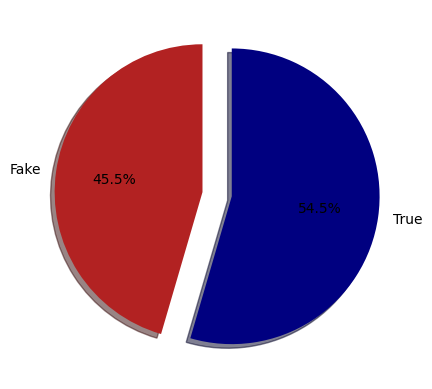

In [7]:
# Checking if our data is well balanced
label_size = [data['label'].sum(),len(data['label'])-data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [8]:
pip install ftfy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\athar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38193 entries, 0 to 38192
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   38193 non-null  object
 1   text    38193 non-null  object
 2   Target  38193 non-null  object
 3   label   38193 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 1.0+ MB


In [10]:
import re, ftfy

def clean_for_bert(text):
    if not isinstance(text, str):
        return ""
    text = ftfy.fix_text(text)  # fix encoding issues
    text = re.sub(r"<.*?>", " ", text)  # remove HTML tags
    text = re.sub(r"http\S+|www\S+", "<URL>", text)  # replace URLs
    text = re.sub(r"\s+", " ", text).strip()  # collapse whitespace
    return text

data['bert_text'] = data.apply(
    lambda r: f"{r['title']} [SEP] {clean_for_bert(r['text'])}", axis=1
)

In [11]:
data.head()

C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,title,text,Target,label,bert_text
0,factbox: who will trump pick to lead the feder...,(reuters) - u.s. president donald trump has in...,True,0,factbox: who will trump pick to lead the feder...
1,"uae criticizes 'colonial' role of iran, turkey...",abu dhabi (reuters) - the united arab emirates...,True,0,"uae criticizes 'colonial' role of iran, turkey..."
2,“everyday american”? u.s. taxpayers pick up th...,slick willy s back! bill clinton had fun on th...,Fake,1,“everyday american”? u.s. taxpayers pick up th...
3,watch trump’s tense confrontation with protest...,turning up to a trump rally to oppose the repu...,Fake,1,watch trump’s tense confrontation with protest...
4,cpac says trump drops out at 'last minute',(reuters) - the conservative political action ...,True,0,cpac says trump drops out at 'last minute' [SE...


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38193 entries, 0 to 38192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      38193 non-null  object
 1   text       38193 non-null  object
 2   Target     38193 non-null  object
 3   label      38193 non-null  int32 
 4   bert_text  38193 non-null  object
dtypes: int32(1), object(4)
memory usage: 1.3+ MB


In [13]:
df = data.copy()


In [14]:
from sklearn.model_selection import train_test_split

# Train-Validation-Test split into 70:15:15 ratio

# Train-Temp split (70% train, 30% temp)
train_text, temp_text, train_labels, temp_labels = train_test_split(
    df['bert_text'],
    df['label'],
    random_state=2018,
    test_size=0.3,
    stratify=df['Target']   # stratify on label for balanced split
)

# Validation-Test split (15% each)
val_text, test_text, val_labels, test_labels = train_test_split(
    temp_text,
    temp_labels,
    random_state=2018,
    test_size=0.5,
    stratify=temp_labels   # stratify again to maintain class balance
)

In [15]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\athar\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Error while downloading from ht

Text(0, 0.5, 'Number of texts')

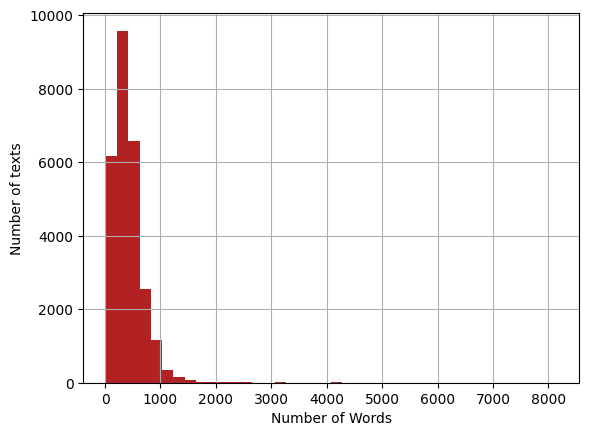

In [16]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [ ]:
lengths = df['bert_text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))
print(lengths.describe(percentiles=[.5, .75, .9, .95, .99]))


Token indices sequence length is longer than the specified maximum sequence length for this model (625 > 512). Running this sequence through the model will result in indexing errors


KeyboardInterrupt: 

In [17]:
df.head()

C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,title,text,Target,label,bert_text
0,factbox: who will trump pick to lead the feder...,(reuters) - u.s. president donald trump has in...,True,0,factbox: who will trump pick to lead the feder...
1,"uae criticizes 'colonial' role of iran, turkey...",abu dhabi (reuters) - the united arab emirates...,True,0,"uae criticizes 'colonial' role of iran, turkey..."
2,“everyday american”? u.s. taxpayers pick up th...,slick willy s back! bill clinton had fun on th...,Fake,1,“everyday american”? u.s. taxpayers pick up th...
3,watch trump’s tense confrontation with protest...,turning up to a trump rally to oppose the repu...,Fake,1,watch trump’s tense confrontation with protest...
4,cpac says trump drops out at 'last minute',(reuters) - the conservative political action ...,True,0,cpac says trump drops out at 'last minute' [SE...


In [18]:
from transformers import BertTokenizer

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Set max sequence length
MAX_LENGTH = 512  # BERT’s maximum input length

# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=MAX_LENGTH,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=MAX_LENGTH,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=MAX_LENGTH,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [19]:
# Convert tokenized outputs to tensors directly
train_seq = tokens_train['input_ids']
train_mask = tokens_train['attention_mask']
train_y = torch.tensor(train_labels.tolist())

val_seq = tokens_val['input_ids']
val_mask = tokens_val['attention_mask']
val_y = torch.tensor(val_labels.tolist())

test_seq = tokens_test['input_ids']
test_mask = tokens_test['attention_mask']
test_y = torch.tensor(test_labels.tolist())

In [20]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Define batch size (you can tune this based on GPU memory)
batch_size = 32

# Train DataLoader
train_data = TensorDataset(train_seq, train_mask, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Validation DataLoader
val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Test DataLoader
test_data = TensorDataset(test_seq, test_mask, test_y)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [21]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

In [22]:
import torch
import torch.nn as nn
from torch.optim import AdamW
from transformers import BertModel

# ---------------------------
# BERT Architecture
# ---------------------------
class BERT_Arch(nn.Module):
    def __init__(self):   # <-- FIXED: double underscores
        super(BERT_Arch, self).__init__()

        # Load BERT backbone
        self.bert = BertModel.from_pretrained("bert-base-uncased")

        # Freeze BERT parameters
        for param in self.bert.parameters():
            param.requires_grad = False

        # Classifier layers
        self.classifier = nn.Sequential(
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, sent_id, mask):
        # Forward pass through BERT
        outputs = self.bert(sent_id, attention_mask=mask)
        cls_hs = outputs.pooler_output   # [CLS] pooled output

        # Forward pass through classifier
        x = self.classifier(cls_hs)
        return x


# ---------------------------
# Initialize Model
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERT_Arch().to(device)

# ---------------------------
# Optimizer & Loss
# ---------------------------
print(f"Number of trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.NLLLoss()

print("✅ Model initialized successfully!")
print(f"📌 Using device: {device}")


Number of trainable parameters: 394754
✅ Model initialized successfully!
📌 Using device: cpu


In [23]:
# Define Loss Function
cross_entropy = nn.CrossEntropyLoss()

# ---------------------------
# Training Function
# ---------------------------
def train():
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        if step % 50 == 0 and not step == 0:  # Progress update
            print(f'  Batch {step:>5,}  of  {len(train_dataloader):>5,}.')

        # Move batch to device
        sent_id, mask, labels = [r.to(device) for r in batch]

        # Reset gradients
        model.zero_grad()

        # Forward pass
        preds = model(sent_id, mask)

        # Compute loss
        loss = cross_entropy(preds, labels)
        total_loss += loss.item()

        # Backward pass
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters
        optimizer.step()

    # Compute average training loss
    avg_loss = total_loss / len(train_dataloader)
    return avg_loss


# ---------------------------
# Evaluation Function
# ---------------------------
def evaluate():
    print("\nEvaluating...")
    model.eval()
    total_loss = 0

    for step, batch in enumerate(val_dataloader):
        if step % 50 == 0 and not step == 0:
            print(f'  Batch {step:>5,}  of  {len(val_dataloader):>5,}.')

        # Move batch to device
        sent_id, mask, labels = [t.to(device) for t in batch]

        with torch.no_grad():  # No gradient calculation
            preds = model(sent_id, mask)
            loss = cross_entropy(preds, labels)
            total_loss += loss.item()

    # Compute average validation loss
    avg_loss = total_loss / len(val_dataloader)
    return avg_loss

In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]
epochs=3
for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 3
  Batch    50  of    836.
  Batch   100  of    836.
  Batch   150  of    836.
  Batch   200  of    836.
  Batch   250  of    836.
  Batch   300  of    836.
  Batch   350  of    836.
  Batch   400  of    836.
  Batch   450  of    836.
  Batch   500  of    836.
  Batch   550  of    836.
  Batch   600  of    836.
  Batch   650  of    836.
  Batch   700  of    836.
  Batch   750  of    836.
  Batch   800  of    836.

Evaluating...
  Batch    50  of    180.
  Batch   100  of    180.
  Batch   150  of    180.

Training Loss: 0.436
Validation Loss: 0.264

 Epoch 2 / 3
  Batch    50  of    836.
  Batch   100  of    836.
  Batch   150  of    836.
  Batch   200  of    836.
  Batch   250  of    836.
  Batch   300  of    836.
  Batch   350  of    836.
  Batch   400  of    836.
  Batch   450  of    836.
  Batch   500  of    836.
  Batch   550  of    836.
  Batch   600  of    836.
  Batch   650  of    836.
  Batch   700  of    836.
  Batch   750  of    836.
  Batch   800  of    836.

E

In [25]:
# load weights of best model onto CPU
path = 'c2_new_model_weights (1).pt'
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()


BERT_Arch(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_aff

In [27]:
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import classification_report

# Create dataset & dataloader for batching
test_data = TensorDataset(test_seq, test_mask, test_y)
test_loader = DataLoader(test_data, batch_size=16)  # adjust batch_size if needed

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        b_seq, b_mask, b_labels = batch

        # If model is on GPU, move tensors too
        if next(model.parameters()).is_cuda:
            b_seq = b_seq.to("cuda")
            b_mask = b_mask.to("cuda")

        outputs = model(b_seq, b_mask)   # forward pass
        preds = outputs.detach().cpu().numpy()

        all_preds.append(preds)
        all_labels.append(b_labels.numpy())

# Concatenate everything
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Get predicted classes
final_preds = np.argmax(all_preds, axis=1)

# Print classification report
print(classification_report(all_labels, final_preds))


KeyboardInterrupt: 